## Face Detection
- 6개의 랜드마크와 멀티 기능 제공
- Segmentation

`MODEL_SELECTION`
- 0: short-range (2미터 이내)
- 1: full-range (5미터 이내)

`MIN_DETECTION_CONFIDENCE`
- 신뢰도, 기본 0.5 (0~1)

#### Output
- detection proto msg(box와 6개 키포인트)
- 오른쪽 눈, 왼쪽 눈, 코 끝, 입 중앙, 오른쪽 귀, 왼쪽 귀

In [9]:
import glob

In [10]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# 이미지
IMAGE_FILES = glob.glob("./test_fd/*")
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    #BGR -> RGB
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP)) # 코 끝 좌표 반환
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('./annotated_image' + str(idx) + '.png', annotated_image) # 이미지 저장

Nose tip:
x: 0.2999757
y: 0.68170244

Nose tip:
x: 0.6894745
y: 0.55676866

Nose tip:
x: 0.501737
y: 0.44891024

Nose tip:
x: 0.5349358
y: 0.49290395



In [ ]:
# 웹캠
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    if cv2.waitKey(1)==ord("q"): break
cap.release()
cv2.destroyAllWindows()

## Face Mesh
- 3D 468개 랜드마크
- 센서 없이 카메라 입력만으로도 사용 가능
- 얼굴 위치를 계산하는 감지기(1)와 회귀를 통해 3D 표면을 예측하는 3D 랜드마크 모델(2) 두 개의 NN 모델로 구성
- 렌더링 모델을 이용해서 AR 기능 추가 가능

`STATIC_IMAGE_MODE`
- `False`: 비디오 인풋으로 받음
- `True`: 모든 이미지에 대해 검출

`MAX_NUM_FACES`
- default=1, 최대 검출 개수

`REFINE_LANDMARKS`
- 홍채 주변 랜드마크 설정 여부

#### Output
- x, y, z (w, h, d)

In [7]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

IMAGE_FILES = glob.glob("./test_fd/*")
# 이미지
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, refine_landmarks=True, min_detection_confidence=0.5) as face_mesh: # TODO: max_num_faces를 조절할 방법을 생각
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('./annotated_image' + str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.2917481
  y: 0.71849763
  z: -0.025008935
}
landmark {
  x: 0.2970336
  y: 0.67374206
  z: -0.0723368
}
landmark {
  x: 0.29771128
  y: 0.6871753
  z: -0.03440796
}
landmark {
  x: 0.28486237
  y: 0.59386504
  z: -0.062240034
}
landmark {
  x: 0.2965389
  y: 0.65057087
  z: -0.079086214
}
landmark {
  x: 0.29606718
  y: 0.6179915
  z: -0.076910354
}
landmark {
  x: 0.2952947
  y: 0.53764176
  z: -0.049947746
}
landmark {
  x: 0.20399162
  y: 0.5199938
  z: 0.004216553
}
landmark {
  x: 0.29452166
  y: 0.47907418
  z: -0.046760436
}
landmark {
  x: 0.2940357
  y: 0.44896472
  z: -0.053331338
}
landmark {
  x: 0.29244226
  y: 0.33180666
  z: -0.054937456
}
landmark {
  x: 0.29183725
  y: 0.7237893
  z: -0.02223174
}
landmark {
  x: 0.29242316
  y: 0.72883415
  z: -0.017785665
}
landmark {
  x: 0.2932574
  y: 0.7319807
  z: -0.011822551
}
landmark {
  x: 0.293557
  y: 0.7729324
  z: -0.0041920496
}
landmark {
  x: 0.29326797
  y: 0.78131974
  z: -0.005707

In [8]:
# 비디오
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

## Pose

#### Output
- x, y: 정규화된 랜드마크 좌표
- z: 깊이
- visibility: alpha값인듯

`SEGMENTATION_MASK`
- 배경 날리는 용도

In [10]:
pose_landmark_dict = {
    # Face ###################################
    0: "nose",
    # eyes
    1: "left_eye_inner",
    2: "left_eye",
    3: "left_eye_outer",
    4: "right_eye_inner",
    5: "right_eye",
    6: "right_eye_outer",
    # ears
    7: "left_ear",
    8: "right_ear",
    # mouth
    9: "left_mouth",
    10: "right_mouth",
    # Body ###################################
    # shoulder
    11: "left_shoulder",
    12: "right_shoulder",
    # elbow
    13: "left_elbow",
    14: "right_elbow",
    # wrist
    15: "left_wrist",
    16: "right_wrist",
    # hand
    17: "left_pinky",
    18: "right_pinky",
    19: "left_index",
    20: "right_index",
    21: "left_thumb",
    22: "right_thumb",
    # hip
    23: "left_hip",
    24: "right_hip",
    # knee
    25: "left_knee",
    26: "right_knee",
    # ankle
    27: "left_ankle",
    28: "right_ankle",
    # heel
    29: "left_heel",
    30: "right_heel",
    # foot
    31: "left_foot_index",
    32: "right_foot_index"
}

In [11]:
import numpy as np

Nose coordinates: (93.00376135110855, 32.14108198881149)


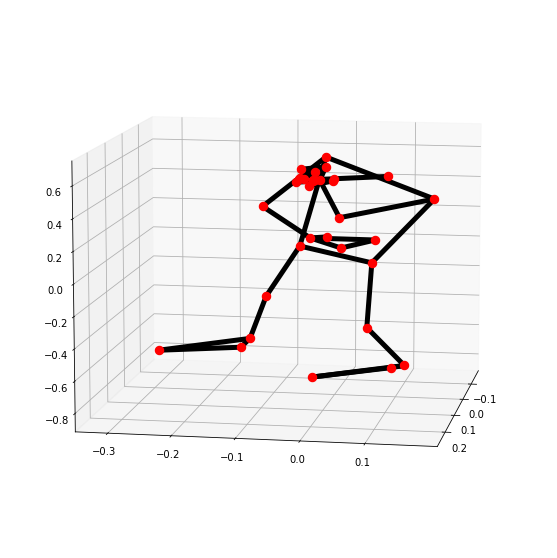

Nose coordinates: (97.23950153589249, 37.33421829342842)


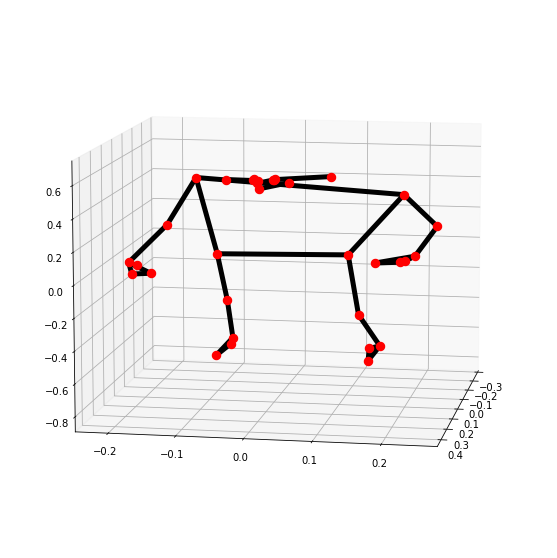

Nose coordinates: (102.46597528457642, 30.500730246305466)


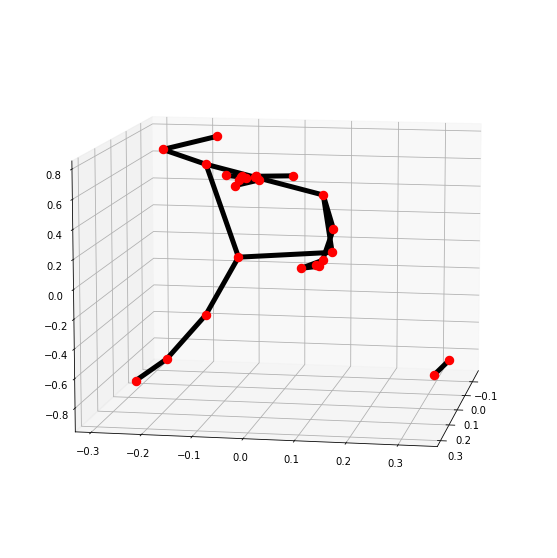

In [15]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

IMAGE_FILES = glob.glob("./test_fd/test_pose_*")
# 이미지 - 한 사람에 대해서만 그림
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('./annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks. 3차원 공간에 마스크 찍어줌
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

2개에 대해서 기준점을 맞추고 유사도를 구하면 될 듯  
-> 스켈레톤 없이 사용해도 괜찮을듯

In [16]:
# 비디오
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

## Holistic
각각 세분화된 모델을 사용하는게 좋을꺼 같음

In [17]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

## Hand

In [19]:
hand_landmarks_dict = {
    0: "wrist",
    1: "thumb_cmc",
    2: "thumb_mcp",
    3: "thumb_ip",
    4: "thumb_tip",
    5: "index_mcp",
    6: "index_pip",
    7: "index_dip",
    8: "index_tip",
    9: "middle_mcp",
    10: "middle_pip",
    11: "middle_dip",
    12: "middle_tip",
    13: "ring_mcp",
    14: "ring_pip",
    15: "ring_dip",
    16: "ring_tip",
    17: "pinky_mcp",
    18: "pinky_pip",
    19: "pinky_dip",
    20: "pinky_tip"
}

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()